# Circular domain



In [9]:
import openmesh as om
import numpy as np
import math
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

Theta = np.arange(0, math.pi+0.001, math.pi/19)
R = np.array([0, 3, 5, 7, 8.5])
P = np.array([[r*math.cos(theta), r*math.sin(theta)] for r in R for theta in Theta])

P=P[len(Theta)-1:len(P),:]

In [10]:
# save the mesh
#
import sys
def save_mesh(P, T, filename):
    mesh = om.TriMesh()
    vh=[]
    for p in P:     
        vh.append(mesh.add_vertex([p[0], p[1], 0]))    
    for t in T.simplices:
        mesh.add_face(vh[t[0]],vh[t[1]],vh[t[2]])
    om.write_mesh(filename, mesh)

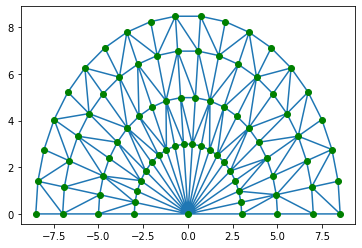

In [11]:
T = Delaunay(P)
plt.triplot(P[:,0],P[:,1],T.simplices)
plt.plot(P[:,0],P[:,1],'go')

save_mesh(P,T,'halfcircle.off')

...this does not look too pretty: maybe with less points in the inner parts

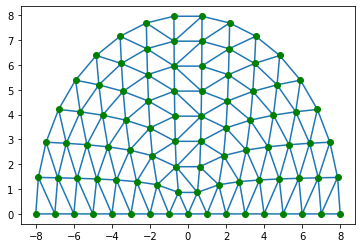

In [42]:
R = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# R = np.array([2, 5, 8])
# R = np.array([4, 8])
P = np.array([0, 0])

for r in R:
    # The number of points of the half-circle is adapted to the radius
    Theta = np.arange(0, math.pi+0.001, math.pi/(1+2*int(r)))
    # Theta = np.arange(0, math.pi+0.001, math.pi/(1+int(r)))
    # P = np.array([[r*math.cos(theta), r*math.sin(theta)] for r in R for theta in Theta])
    p = np.array([[r*math.cos(theta), r*math.sin(theta)] for theta in Theta])
    P = np.vstack((P,p))

T = Delaunay(P)
plt.triplot(P[:,0],P[:,1],T.simplices)
plt.plot(P[:,0],P[:,1],'go')    

Given this mesh for the model of drug liberation we need to add an outer area, which could be considered outside the data structure (but then requires to keep tracking for this extra data structure). Adding the domain within the data structure we need to calculate that area, which also needs to be done manually if it is not triangular. So, the most systematic approach is to fill the remaining domain also with a triangular grid. 

The supposed instant diffusion of a model assumption that justifies a single exterior area can be handled by a relative high diffusion constant.

To fill the rectangular domain we generate a homotopy between the points in the spheare border to the points of the domain border,
setting mesh points on the linear connection lines.

18
18
0.2
0.4
0.6000000000000001
0.8


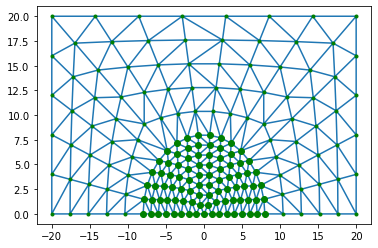

In [43]:
Y1 = np.arange(0, 20, 4)
P1 = np.array([[x, y] for x in np.array([20]) for y in Y1])
Y1 = np.arange(20, -20, -40/7) # this is the line to match the lengths of "Pext" and "Pint"
P2 = np.array([[x, y] for x in Y1 for y in np.array([20])])
Y2 = np.arange(20, -1, -4)    
P3 = np.array([[x, y] for x in np.array([-20]) for y in Y2])

Pext = np.concatenate((P1,P2,P3))
Pint = np.array([[r*math.cos(theta), r*math.sin(theta)] for r in np.array([max(R)]) for theta in Theta])
print(len(Pext)); print(len(Pint)); 

PP=Pext
# feature: exclude Pint, which is part of the given mesh
# dalpha=1/2
dalpha=1/5
for alpha in np.arange(dalpha, 1, dalpha):
    # print(alpha)
    pp = alpha*Pext + (1-alpha)*Pint # linear interpolation
    PP = np.concatenate((PP,pp))
    
plt.plot(PP[:,0],PP[:,1],'g.')
PPP = np.concatenate((P,PP))

TTT = Delaunay(PPP)
plt.triplot(PPP[:,0],PPP[:,1],TTT.simplices)
plt.plot(P[:,0],P[:,1],'go')

save_mesh(PPP, TTT, 'liberation.off')